In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

LOAD THE DATA

In [ ]:
df = pd.read_csv('/content/Language Detection.csv')
df.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


PREPROCESS, MISSING VALUES,DUPLICATES, INCONSITENSIES

In [ ]:
df["Language"].unique()


array(['English', 'Malayalam', 'Hindi', 'Tamil', 'Kannada'], dtype=object)

In [ ]:
# List of languages to keep
indian_languages = ['English', 'Malayalam', 'Hindi', 'Tamil', 'Kannada']

# Filtering the DataFrame
df= df[df["Language"].isin(indian_languages)]

# Display the new DataFrame
print(df)

                                                    Text Language
0      nature in the broadest sense is the natural ph...  English
1      nature can refer to the phenomena of the physi...  English
2      the study of nature is a large if not the only...  English
3      although humans are part of nature human activ...  English
4      the word nature is borrowed from the old frenc...  English
...                                                  ...      ...
10332  ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...  Kannada
10333  ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...  Kannada
10334  ಹೇಗೆ ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎಲ್...  Kannada
10335  ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...  Kannada
10336  ಟೆರ್ರಿ ನೀವು ನಿಜವಾಗಿಯೂ ಆ ದೇವದೂತನಂತೆ ಸ್ವಲ್ಪ ಕಾಣು...  Kannada

[2880 rows x 2 columns]


FEATURE EXTRACTION

1. WORD EMBEDDING - WORD2VEC, TF-IDF. WORD N-grams

In [ ]:
import pandas as pd
import re
import string

# Load the dataset
# Function to clean text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans("", "", string.punctuation))  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

# Apply cleaning
df["Text"] = df["Text"].astype(str).apply(clean_text)

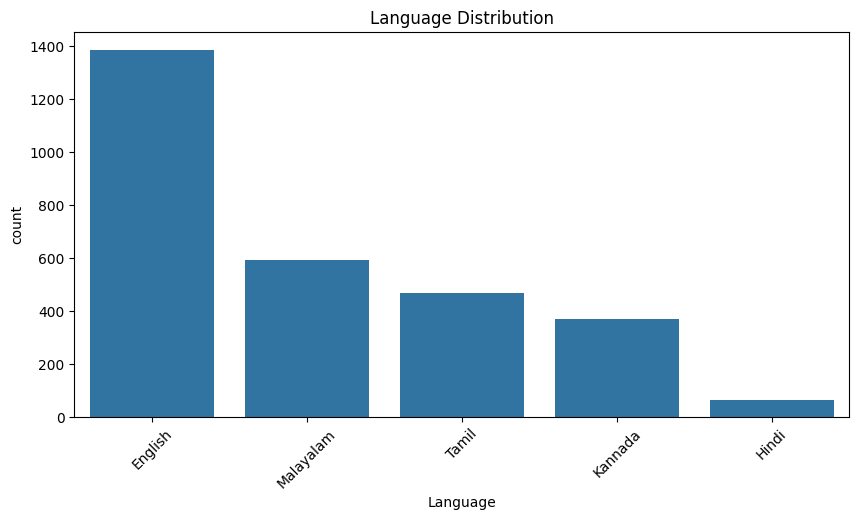

In [ ]:
# Language distribution
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="Language", order=df["Language"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Language Distribution")
plt.show()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(1, 3))  # Character-level n-grams
X = vectorizer.fit_transform(df["Text"])
y = df["Language"]
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [ ]:
#SVM to clsssify the languages
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Train model using SVM with RBF kernel
model = SVC(kernel='rbf', C=1.0, gamma='scale')
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))




              precision    recall  f1-score   support

           0       1.00      1.00      1.00       277
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        74
           3       1.00      1.00      1.00       119
           4       1.00      1.00      1.00        94

    accuracy                           1.00       576
   macro avg       1.00      1.00      1.00       576
weighted avg       1.00      1.00      1.00       576



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the model
nb_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Accuracy: 1.0
              precision    recall  f1-score   support

     English       1.00      1.00      1.00       285
       Hindi       1.00      1.00      1.00        12
     Kannada       1.00      1.00      1.00        76
   Malayalam       1.00      1.00      1.00       113
       Tamil       1.00      1.00      1.00        90

    accuracy                           1.00       576
   macro avg       1.00      1.00      1.00       576
weighted avg       1.00      1.00      1.00       576



In [ ]:
#LSTM MODEL FOR CLASSIFICATION
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(df['Text'])
sequences = tokenizer.texts_to_sequences(df['Text'])


max_length = 100
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

X_train, X_test, y_train, y_test = train_test_split(padded_sequences, y, test_size=0.2, random_state=42)


model = Sequential()
model.add(Embedding(5000, 128, input_length=max_length))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))


model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {accuracy}')

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


72/72 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.4890 - loss: 1.3704 - val_accuracy: 0.5000 - val_loss: 1.3080
Epoch 2/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4915 - loss: 1.2951 - val_accuracy: 0.5000 - val_loss: 1.2932
Epoch 3/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4680 - loss: 1.3437 - val_accuracy: 0.5017 - val_loss: 1.2815
Epoch 4/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5034 - loss: 1.2691 - val_accuracy: 0.5000 - val_loss: 1.2934
Epoch 5/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4735 - loss: 1.3168 - val_accuracy: 0.5000 - val_loss: 1.2896
Epoch 6/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4905 - loss: 1.2879 - val_accuracy: 0.5000 - val_loss: 1.2884
Epoch 7/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4798 - loss: 1.3029 - val_accuracy: 0.5000 - val_loss: 1.2840
Epoch 8/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4875 - loss: 1.3064 - val_accuracy: 0.5000 - val_loss: 1.2846


In [ ]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_))

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
              precision    recall  f1-score   support

     English       0.50      1.00      0.66       285
       Hindi       1.00      0.25      0.40        12
     Kannada       0.00      0.00      0.00        76
   Malayalam       0.00      0.00      0.00       113
       Tamil       0.00      0.00      0.00        90

    accuracy                           0.50       576
   macro avg       0.30      0.25      0.21       576
weighted avg       0.27      0.50      0.34       576



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4887 - loss: 1.2906 - val_accuracy: 0.5000 - val_loss: 1.2814
Epoch 2/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.4815 - loss: 1.2961 - val_accuracy: 0.5000 - val_loss: 1.2837
Epoch 3/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.4830 - loss: 1.2924 - val_accuracy: 0.5000 - val_loss: 1.2835
Epoch 4/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.4817 - loss: 1.3033 - val_accuracy: 0.5017 - val_loss: 1.2795
Epoch 5/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.4787 - loss: 1.3022 - val_accuracy: 0.5017 - val_loss: 1.2804
Epoch 6/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4961 - loss: 1.2843 - val_accuracy: 0.5017 - val_loss: 1.2809
Epoch 7/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4947 - loss: 1.2856 - val_accuracy: 0.5017 - val_loss: 1.2786
Epoch 8/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4827 - loss: 1.2826 - val_accuracy: 0.5017 - va

<function matplotlib.pyplot.title(label: 'str', fontdict: 'dict[str, Any] | None' = None, loc: "Literal['left', 'center', 'right'] | None" = None, pad: 'float | None' = None, *, y: 'float | None' = None, **kwargs) -> 'Text'>

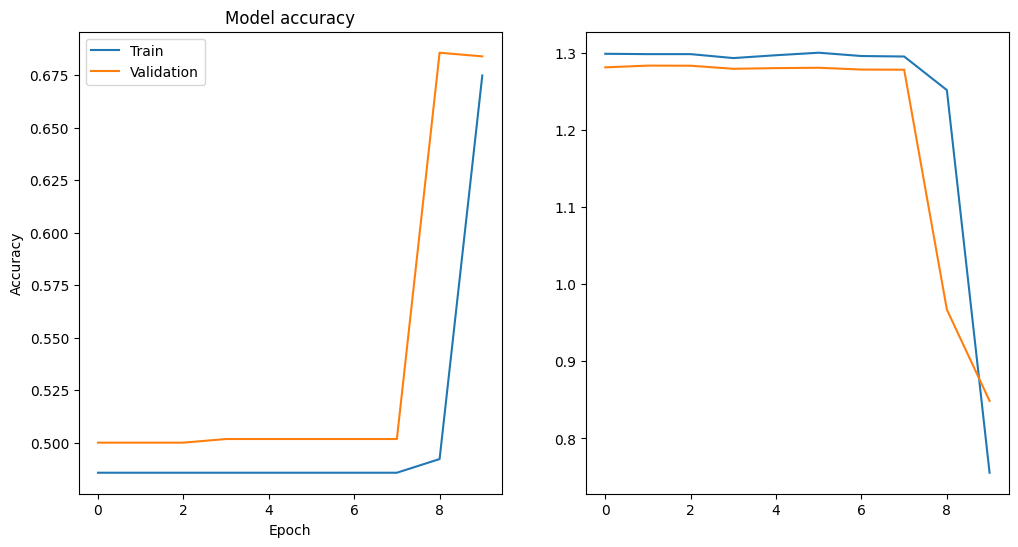

In [ ]:
import matplotlib.pyplot as plt

# Get training history
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title

In [ ]:
!pip install nlpaug==1.1.7

In [ ]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.5 MB/s eta 0:00:00


In [ ]:
print(df.columns)


Index(['Text', 'Language'], dtype='object')


In [ ]:
pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.7 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df["Language"])


tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(df['Text'])
sequences = tokenizer.texts_to_sequences(df['Text'])
max_length = 100
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, y, test_size=0.2, random_state=42)

# Define model with hyperparameter tuning
def build_model(hp):
    model = Sequential()
    model.add(Embedding(input_dim=5000,
                        output_dim=hp.Choice('embedding_dim', [64, 128, 256]),
                        input_length=max_length))

    model.add(LSTM(units=hp.Int('lstm_units', min_value=32, max_value=128, step=32), return_sequences=False))
    model.add(Dropout(rate=hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)))

    model.add(Dense(len(label_encoder.classes_), activation='softmax'))

    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Bayesian Optimization
tuner = kt.BayesianOptimization(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='bayesian_hyperparameter_tuning',
    project_name='lstm_text_classification'
)

# Perform hyperparameter search
tuner.search(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Get the best model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
Best hyperparameters:
- Embedding Dimension: {best_hps.get('embedding_dim')}
- LSTM Units: {best_hps.get('lstm_units')}
- Dropout Rate: {best_hps.get('dropout_rate')}
- Learning Rate: {best_hps.get('learning_rate')}
""")

# Train final model with best hyperparameters
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate final model
loss, accuracy = best_model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy with Best Hyperparameters: {accuracy}")


Trial 10 Complete [00h 00m 10s]
val_accuracy: 0.5017361044883728

Best val_accuracy So Far: 0.5017361044883728
Total elapsed time: 00h 02m 00s

Best hyperparameters:
- Embedding Dimension: 128
- LSTM Units: 128
- Dropout Rate: 0.2
- Learning Rate: 0.001

Epoch 1/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4447 - loss: 1.3834 - val_accuracy: 0.5000 - val_loss: 1.2908
Epoch 2/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4800 - loss: 1.3111 - val_accuracy: 0.5000 - val_loss: 1.2863
Epoch 3/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4776 - loss: 1.3140 - val_accuracy: 0.5017 - val_loss: 1.2813
Epoch 4/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4842 - loss: 1.3005 - val_accuracy: 0.5000 - val_loss: 1.2877
Epoch 5/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4936 - loss: 1.2965 - val_accuracy: 0.5000 - val_loss: 1.2857
Epoch 6/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5013 - loss: 1.2858 - val_accuracy: 0.5000 - val_